# __Data Processing__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

In [3]:
# import data
data = pd.read_csv(r"C:\Users\zconn\Desktop\GTECH_731_Final\GTECH_731_Final\Milwaukee_Housing.csv")

In [4]:
# display numbers of rows and columns
data.shape

(1449, 17)

In [4]:
# view the data
data.head()

,Stories,FinSqft,Bedrms,Baths,LotSize,SaleDate,month,SalePrice,Ald,Age,FullBase,Attic,FIREPLACE,AIR_CONDITIONING,Garage,X,Y
0,1.0,1560,4,1.5,4680,2012,4,61000,1,76,1,1,0,0,1,2551959.604,405664.0175
1,1.0,1538,3,1.5,7100,2012,6,85900,1,65,1,1,1,1,1,2543592.804,416385.2434
2,1.0,1359,3,1.0,5040,2012,7,87500,1,72,0,1,0,1,1,2553561.415,412893.5885
3,1.0,1339,3,2.5,5000,2012,3,89900,1,70,1,1,0,1,1,2551449.065,408569.1000
4,1.0,1213,3,1.0,5125,2012,9,64500,1,61,1,1,0,1,1,2541430.478,412143.3766


In [5]:
# display column names
data.columns

Index(['Stories', 'FinSqft', 'Bedrms', 'Baths', 'LotSize', 'SaleDate', 'month',
       'SalePrice', 'Ald', 'Age', 'FullBase', 'Attic', 'FIREPLACE',
       'AIR_CONDITIONING', 'Garage', 'X', 'Y'],
      dtype='object')

In [6]:
# Remove unnecessary columns and reorder so independent variable is last
data = data[['Stories', 'FinSqft', 'Bedrms', 'Baths', 'LotSize', 'Age', 'FullBase',
             'Attic', 'FIREPLACE','AIR_CONDITIONING', 'Garage', 'SalePrice']]

data.head()

,Stories,FinSqft,Bedrms,Baths,LotSize,Age,FullBase,Attic,FIREPLACE,AIR_CONDITIONING,Garage,SalePrice
0,1.0,1560,4,1.5,4680,76,1,1,0,0,1,61000
1,1.0,1538,3,1.5,7100,65,1,1,1,1,1,85900
2,1.0,1359,3,1.0,5040,72,0,1,0,1,1,87500
3,1.0,1339,3,2.5,5000,70,1,1,0,1,1,89900
4,1.0,1213,3,1.0,5125,61,1,1,0,1,1,64500


<function matplotlib.pyplot.show(*args, **kw)>

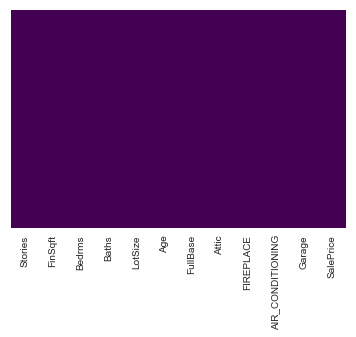

In [136]:
# display any missing values
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show

In [137]:
# count of missing values
data.isnull().sum()

Stories             0
FinSqft             0
Bedrms              0
Baths               0
LotSize             0
Age                 0
FullBase            0
Attic               0
FIREPLACE           0
AIR_CONDITIONING    0
Garage              0
SalePrice           0
dtype: int64

In [138]:
# percentage of values missing
data.isnull().sum()/len(data)*100

Stories             0.0
FinSqft             0.0
Bedrms              0.0
Baths               0.0
LotSize             0.0
Age                 0.0
FullBase            0.0
Attic               0.0
FIREPLACE           0.0
AIR_CONDITIONING    0.0
Garage              0.0
SalePrice           0.0
dtype: float64

In [139]:
# display info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 12 columns):
Stories             1449 non-null float64
FinSqft             1449 non-null int64
Bedrms              1449 non-null int64
Baths               1449 non-null float64
LotSize             1449 non-null int64
Age                 1449 non-null int64
FullBase            1449 non-null int64
Attic               1449 non-null int64
FIREPLACE           1449 non-null int64
AIR_CONDITIONING    1449 non-null int64
Garage              1449 non-null int64
SalePrice           1449 non-null int64
dtypes: float64(2), int64(10)
memory usage: 135.9 KB


In [7]:
# convert binary or "dummy" variables to categorical data type
data['FullBase'] = data['FullBase'].astype('category')
data['Attic'] = data['Attic'].astype('category')
data['FIREPLACE'] = data['FIREPLACE'].astype('category')
data['AIR_CONDITIONING'] = data['AIR_CONDITIONING'].astype('category')
data['Garage'] = data['Garage'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 12 columns):
Stories             1449 non-null float64
FinSqft             1449 non-null int64
Bedrms              1449 non-null int64
Baths               1449 non-null float64
LotSize             1449 non-null int64
Age                 1449 non-null int64
FullBase            1449 non-null category
Attic               1449 non-null category
FIREPLACE           1449 non-null category
AIR_CONDITIONING    1449 non-null category
Garage              1449 non-null category
SalePrice           1449 non-null int64
dtypes: category(5), float64(2), int64(5)
memory usage: 87.0 KB


In [141]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Stories,1449.0,1.296411,0.424509,1.0,1.0,1.0,1.5,3.5
FinSqft,1449.0,1517.120083,623.282887,296.0,1110.0,1356.0,1772.0,6567.0
Bedrms,1449.0,3.363009,0.960209,1.0,3.0,3.0,4.0,9.0
Baths,1449.0,1.631470,0.626148,0.0,1.0,1.5,2.0,5.5
LotSize,1449.0,6092.693582,2786.771731,0.0,4800.0,5400.0,6968.0,22000.0
Age,1449.0,72.506556,24.428865,1.0,57.0,64.0,88.0,164.0
SalePrice,1449.0,132237.072464,84975.207216,7000.0,88000.0,119900.0,152500.0,975000.0


# __Exploratory Analysis__

In [8]:
# create a new column for price in hundred thousands
data['SalePrice'] = data['SalePrice']/100000

# classify homes older than 50 years to be historic
data['Historic'] = np.where(data['Age']>=50, 1, 0)

# view new column
data.head()

,Stories,FinSqft,Bedrms,Baths,LotSize,Age,FullBase,Attic,FIREPLACE,AIR_CONDITIONING,Garage,SalePrice,Historic
0,1.0,1560,4,1.5,4680,76,1,1,0,0,1,0.610,1
1,1.0,1538,3,1.5,7100,65,1,1,1,1,1,0.859,1
2,1.0,1359,3,1.0,5040,72,0,1,0,1,1,0.875,1
3,1.0,1339,3,2.5,5000,70,1,1,0,1,1,0.899,1
4,1.0,1213,3,1.0,5125,61,1,1,0,1,1,0.645,1


# __Univariate analysis__

<function matplotlib.pyplot.show(*args, **kw)>

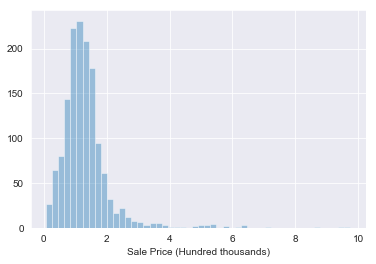

In [9]:
# set up grid
sns.set_style('darkgrid')

# create a histogram
sns.distplot(data['SalePrice'], kde = False)
plt.xlabel('Sale Price (Hundred thousands)')
plt.show

# __Bivariate analysis__

In [142]:
# compare the relationship between the categorical variables and the price
categorical = data.select_dtypes(['category']).columns
print(categorical)
len(categorical)

Index(['FullBase', 'Attic', 'FIREPLACE', 'AIR_CONDITIONING', 'Garage'], dtype='object')


5

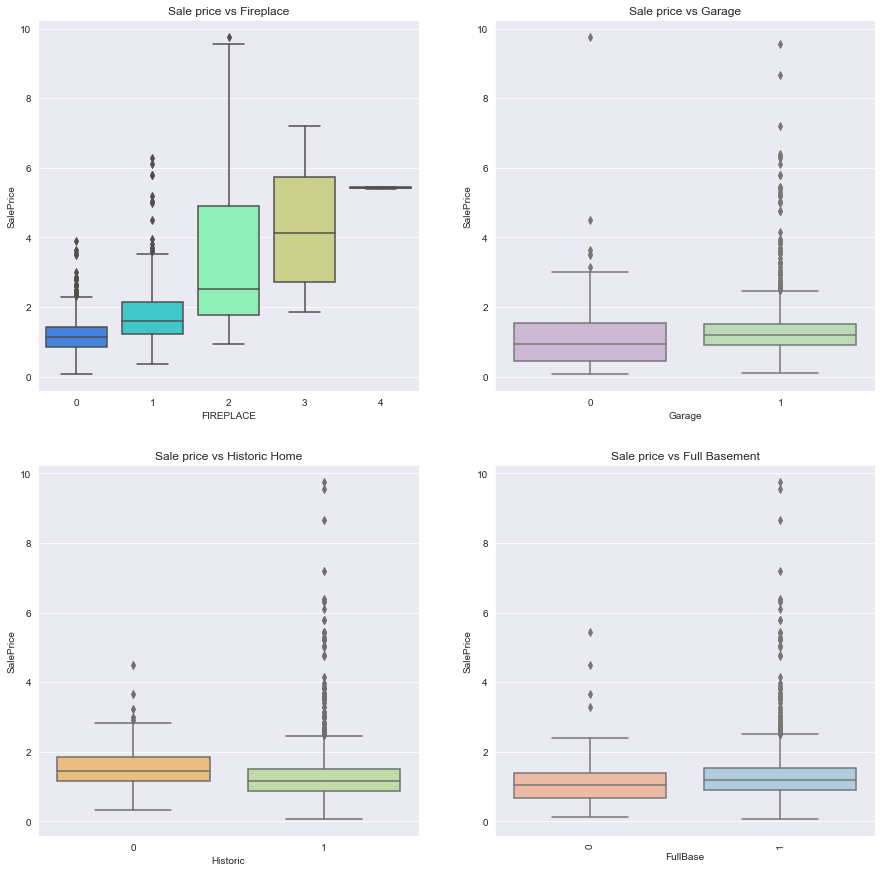

In [10]:
# create plots to view relationships
f, axes = plt.subplots(2,2, figsize = (15,15))

#plot at [0,0]
p1 = sns.boxplot(data.FIREPLACE, data.SalePrice, ax = axes[0,0], palette = 'rainbow')
p1.title.set_text('Sale price vs Fireplace')

#plot at [0,1]
p2 = sns.boxplot(data.Garage, data.SalePrice, ax = axes[0,1], palette = 'PRGn')
p2.title.set_text('Sale price vs Garage')

#plot at [1,0]
p3 = sns.boxplot(data.Historic, data.SalePrice, ax = axes[1,0], palette = 'Spectral')
p3.title.set_text('Sale price vs Historic Home')

#plot at [1,1]
p4 = sns.boxplot(data.FullBase, data.SalePrice, ax = axes[1,1], palette = 'RdBu')
p4.title.set_text('Sale price vs Full Basement')
plt.xticks(rotation = 90)
plt.show()

# __Numeric Features__

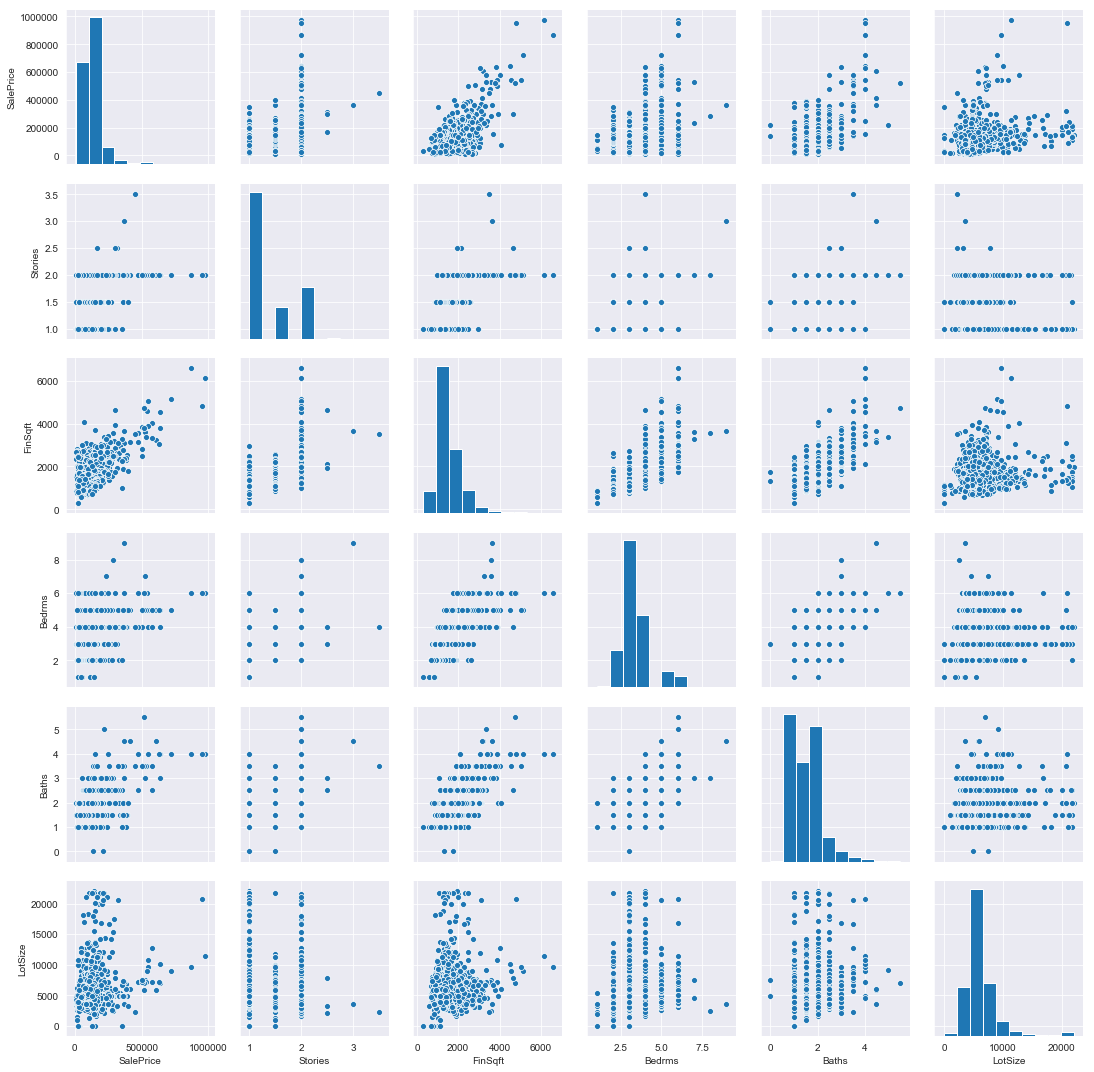

In [144]:
# plot other variables
sns.pairplot(data,
        vars = ['SalePrice', 'Stories', 'FinSqft', 'Bedrms', 'Baths', 'LotSize'], palette = 'RdYlGn')

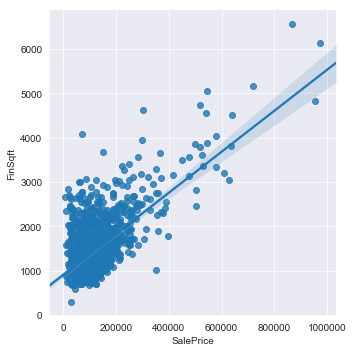

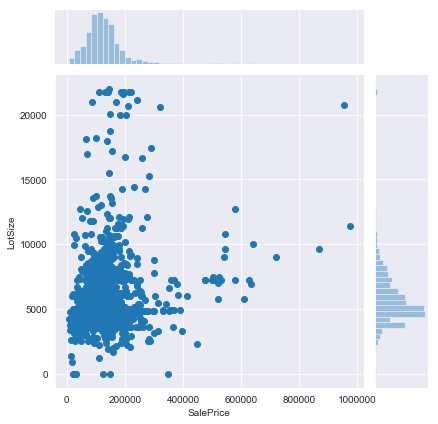

In [145]:
# explore some relationships

# finished sq ft
sns.lmplot(x = "SalePrice", y = "FinSqft", data = data)

# bathroom
sns.jointplot(x = "SalePrice", y = "LotSize", data = data)

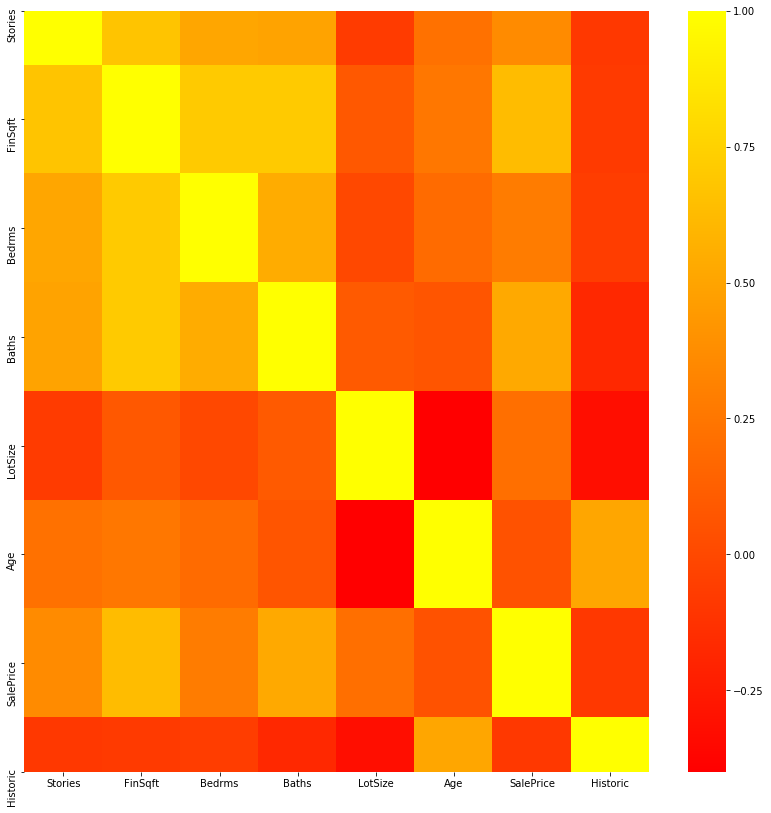

In [32]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), cmap = "autumn")